Q2

Accuracy：It considers the proportion of the model's predictions that are correct across all predictions. It can be used in book software for the recognition and classification of book types.Even if there's a mistake in this task, it won't cost much. We need it to be reasonably accurate.

Sensitivity：It considers the proportion of positive samples that are correctly predicted as positive in practice. For example, in the assessment of serious diseases.For patients with serious illnesses, we must ensure that we do not miss them.We should avoid any omissions.Because it cost much. It is mainly used for situations where a correct but incorrect judgment could lead to serious consequences. 

Specificity：It focuses on the correctly identified portion of the negative class. Higher specificity means the model is less likely to judge negative samples as positive ones. For example, wrongly convicting innocent people. This can result in huge costs for those who are wrongly judged.It is used in situations where getting the correct decision wrong has significant consequences.

Precision：It considers how many of the correct samples are actually correct.It mainly appears in situations which has a low tolerance for error.For example, in testing the safety of household appliances.

Q4

Training set size: 255
Testing set size: 64


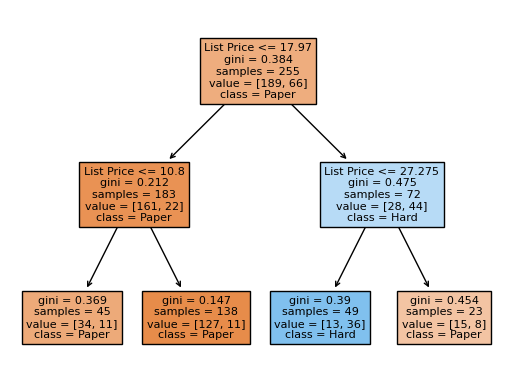

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Load data
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove unnecessary columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Type conversion (using .loc to avoid SettingWithCopyWarning)
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Split dataset into training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Print the size of training and testing sets
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

# Prepare training data
y = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']  # Target variable: whether the book is hardcover
X = ab_reduced_noNaN_train[['List Price']]  # Feature: List Price

# Initialize and train decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualize decision tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()


Q6

Training set size: 255
Testing set size: 64


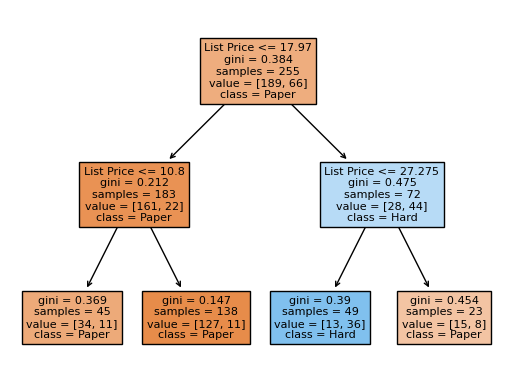

Confusion Matrix:
[[40  4]
 [ 6 14]]
Accuracy: 0.844
Sensitivity (Recall): 0.700
Specificity: 0.909


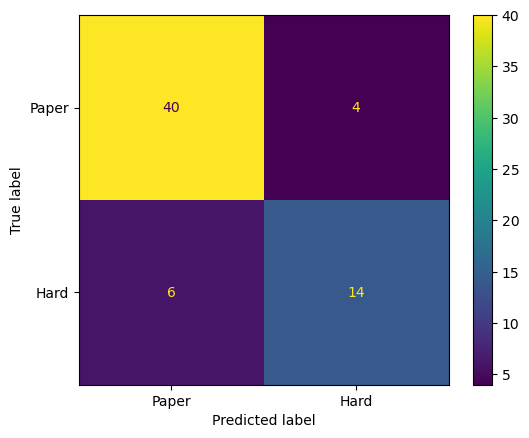

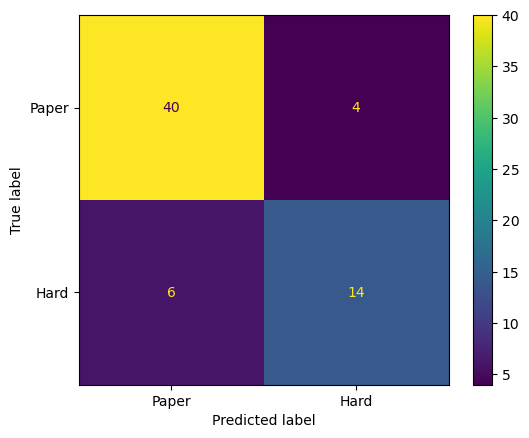

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay

# Load data
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove unnecessary columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Type conversion (using .loc to avoid SettingWithCopyWarning)
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Split dataset into training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Print the size of training and testing sets
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

# Prepare training data
y = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']  # Target variable: whether the book is hardcover
X = ab_reduced_noNaN_train[['List Price']]  # Feature: List Price

# Initialize and train decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualize decision tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()

# Prepare test data
y_test = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['H']  # Target variable: whether the book is hardcover
X_test = ab_reduced_noNaN_test[['List Price']]  # Feature: List Price

# Make predictions using the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Extract values from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity (Recall): {sensitivity:.3f}")

# Calculate specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.3f}")

# Visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["Paper", "Hard"]).plot()
plt.show()



Q7

In Question 4, the model clf uses a single feature (List Price).
In Question 5, the model clf2 uses three features (NumPages, Thick, and List Price), and the maximum depth of the decision tree is set to 4.
The model `clf` uses a single feature, `List Price`.It make is prediction very simple, may not be able to simulate other scenarios well.
In contrast, `clf2` uses more features (`NumPages`, `Thick`, and `List Price`).This allows it to learn the feature of the data in multiple ways.It will perform better than `clf`.

Confusion Matrix for clf2:
[[40  4]
 [ 5 15]]
Accuracy for clf2: 0.859
Sensitivity (Recall) for clf2: 0.750
Specificity for clf2: 0.909


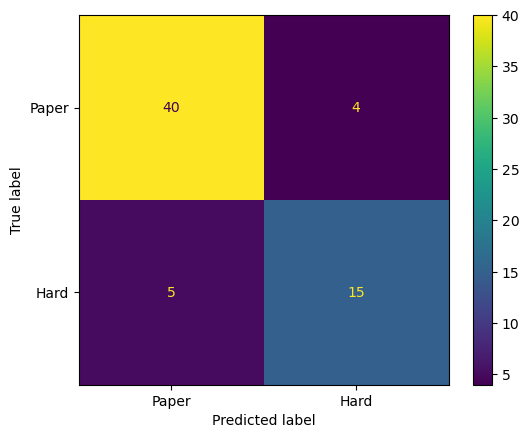

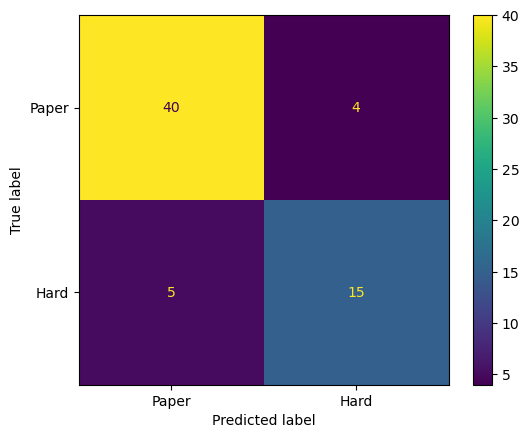

In [8]:
# Prepare features and target for clf2 (from fifth problem)
X_train_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]  # Features for clf2
y_train_clf2 = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']  # Target variable for clf2

# Initialize and train clf2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train_clf2)

# Prepare test data for clf2
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Test features for clf2
y_test_clf2 = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['H']  # Target variable for clf2

# Make predictions using the clf2 test set
y_pred_clf2 = clf2.predict(X_test_clf2)

# Compute confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test_clf2, y_pred_clf2)
print(f"Confusion Matrix for clf2:\n{cm_clf2}")

# Extract values from confusion matrix for clf2
TN_clf2, FP_clf2, FN_clf2, TP_clf2 = cm_clf2.ravel()

# Calculate accuracy for clf2
accuracy_clf2 = accuracy_score(y_test_clf2, y_pred_clf2)
print(f"Accuracy for clf2: {accuracy_clf2:.3f}")

# Calculate sensitivity for clf2
sensitivity_clf2 = recall_score(y_test_clf2, y_pred_clf2)
print(f"Sensitivity (Recall) for clf2: {sensitivity_clf2:.3f}")

# Calculate specificity for clf2
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
print(f"Specificity for clf2: {specificity_clf2:.3f}")

# Visualize confusion matrix for clf2
ConfusionMatrixDisplay.from_estimator(clf2, X_test_clf2, y_test_clf2, display_labels=["Paper", "Hard"]).plot()
plt.show()


Because they capture more complexity in book classification, using additional features (such as page count and thickness) makes the classification more accurate. The inclusion of these features allows the model to distinguish between different categories more precisely. Therefor reducing the number of misclassifications, especially by reducing false positives (FP) and false negatives (FN)